Baseball Data

Data Points to use
- playerID
- yearID
- salary
- RBI
- ERA
- CityID

Questions to answer
- median salary over year (line plot)
- standard deviation of salaries over years (scatterplot)
- Compare RBI to Salary
- Compare ERA to salary
- All time best ERA/RBI combo
- Mean ERA for Colorado pitchers relative to league average

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

filepath = "C:\Python27\Data\Baseball Data"
batting_file = '\Batting.csv'
pitching_file = '\Pitching.csv'
salary_file = '\Salaries.csv'

batting_df = pd.read_csv(filepath+batting_file)
pitching_df = pd.read_csv(filepath+pitching_file)
salary_df = pd.read_csv(filepath+salary_file)

batting_df.fillna(0)
pitching_df.fillna(0)
salary_df.fillna(0)

Populating the interactive namespace from numpy and matplotlib


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [8]:
salary_dict = {}
salary_list = []
year = 1985

for row in salary_df.iterrows():
    if row[1][0] == year:
        salary_list.append(row[1][4])        
        salary_dict.update({year:salary_list})
    else:
        salary_list = []
        year += 1
        salary_list.append(row[1][4])        
        salary_dict.update({year:salary_list})
    



In [9]:
mean_salary_dict = {}
for year in salary_dict:
    mean_salary_dict[year] = mean(salary_dict[year])



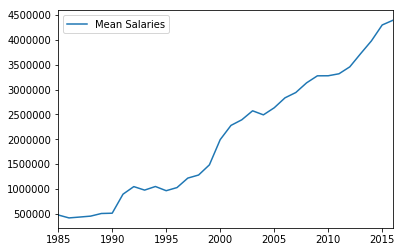

In [89]:
year_salary_df = pd.DataFrame.from_dict(mean_salary_dict, orient='index')
year_salary_df.columns = ["Mean Salaries"]
year_salary_df.plot()

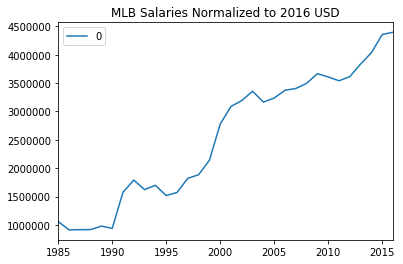

In [68]:
from easymoney.money import EasyPeasy
ep = EasyPeasy()

normalized_salary_dict = {}

for row in year_salary_df.iterrows():
    year = int(row[0])
    salary = int(row[1])
    normalized_salary = ep.normalize(amount=salary, region="US", from_year=year, to_year="latest", base_currency="USD")
    normalized_salary_dict[year] = normalized_salary
    


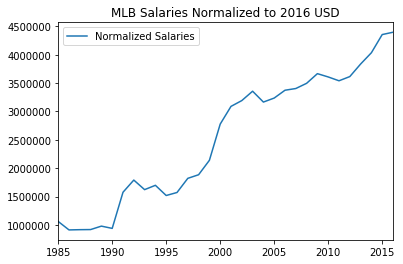

In [88]:

normalized_salary_df = pd.DataFrame.from_dict(normalized_salary_dict, orient='index')
normalized_salary_df.columns = ["Normalized Salaries"]
normalized_salary_df.plot(title="MLB Salaries Normalized to 2016 USD")

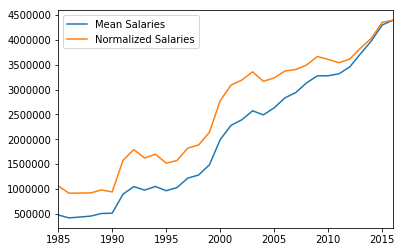

In [90]:
ax = year_salary_df.plot()

normalized_salary_df.plot(ax=ax)

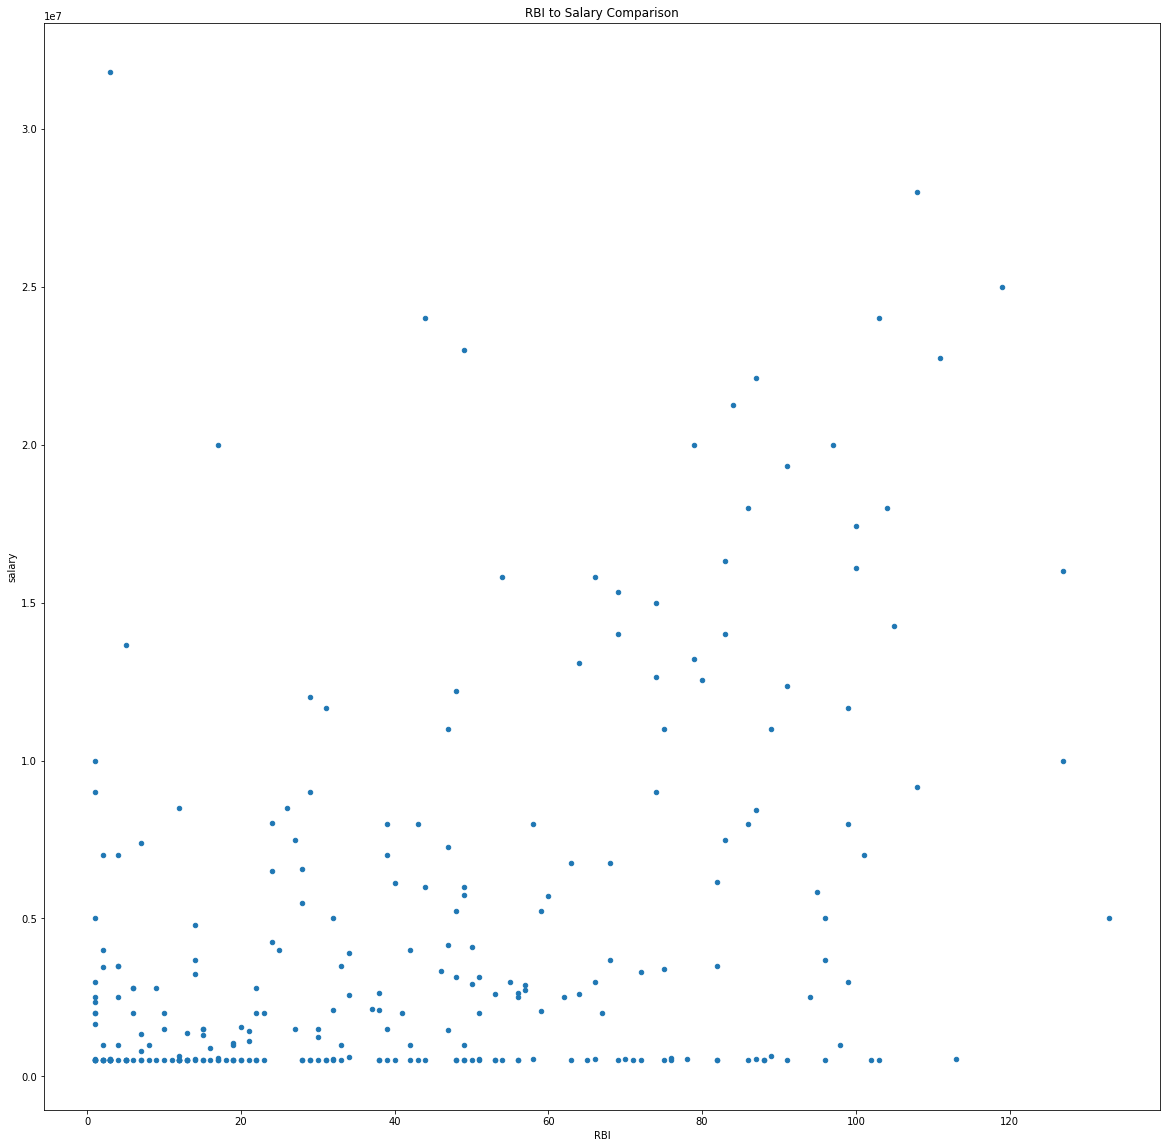

In [157]:
batter_salary_df = batting_df.merge(salary_df, on=["playerID","yearID","teamID", "lgID"], how="inner")
batter_salary_df = batter_salary_df.drop_duplicates(subset=["playerID"], keep="last")
batter_salary_df = batter_salary_df.dropna(subset=["RBI","salary"], how="any")
batter_salary_df = batter_salary_df[batter_salary_df.RBI!=0]
batter_salary_df = batter_salary_df[batter_salary_df.yearID==2016]
batter_salary_df.plot(kind="scatter", x="RBI", y="salary", title="RBI to Salary Comparison", figsize=(20,20))

In [155]:
batter_salary_df[batter_salary_df.RBI>=120]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
24650,arenano01,2016,1,COL,NL,160,618,116,182,35,...,2.0,3.0,68,103.0,10.0,2.0,0.0,8.0,17.0,5000000
24763,encared01,2016,1,TOR,AL,160,601,99,158,34,...,2.0,0.0,87,138.0,3.0,5.0,0.0,8.0,22.0,10000000
24967,ortizda01,2016,1,BOS,AL,151,537,79,169,48,...,2.0,0.0,80,86.0,15.0,2.0,0.0,7.0,22.0,16000000


In [156]:
batter_salary_df[batter_salary_df.salary>=30000000]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
24217,kershcl01,2015,1,LAN,NL,34,71,2,9,2,...,0.0,0.0,2,23.0,0.0,1.0,5.0,0.0,2.0,32571000
24817,greinza01,2016,1,ARI,NL,27,52,4,11,1,...,1.0,0.0,3,9.0,0.0,0.0,3.0,2.0,0.0,31799030


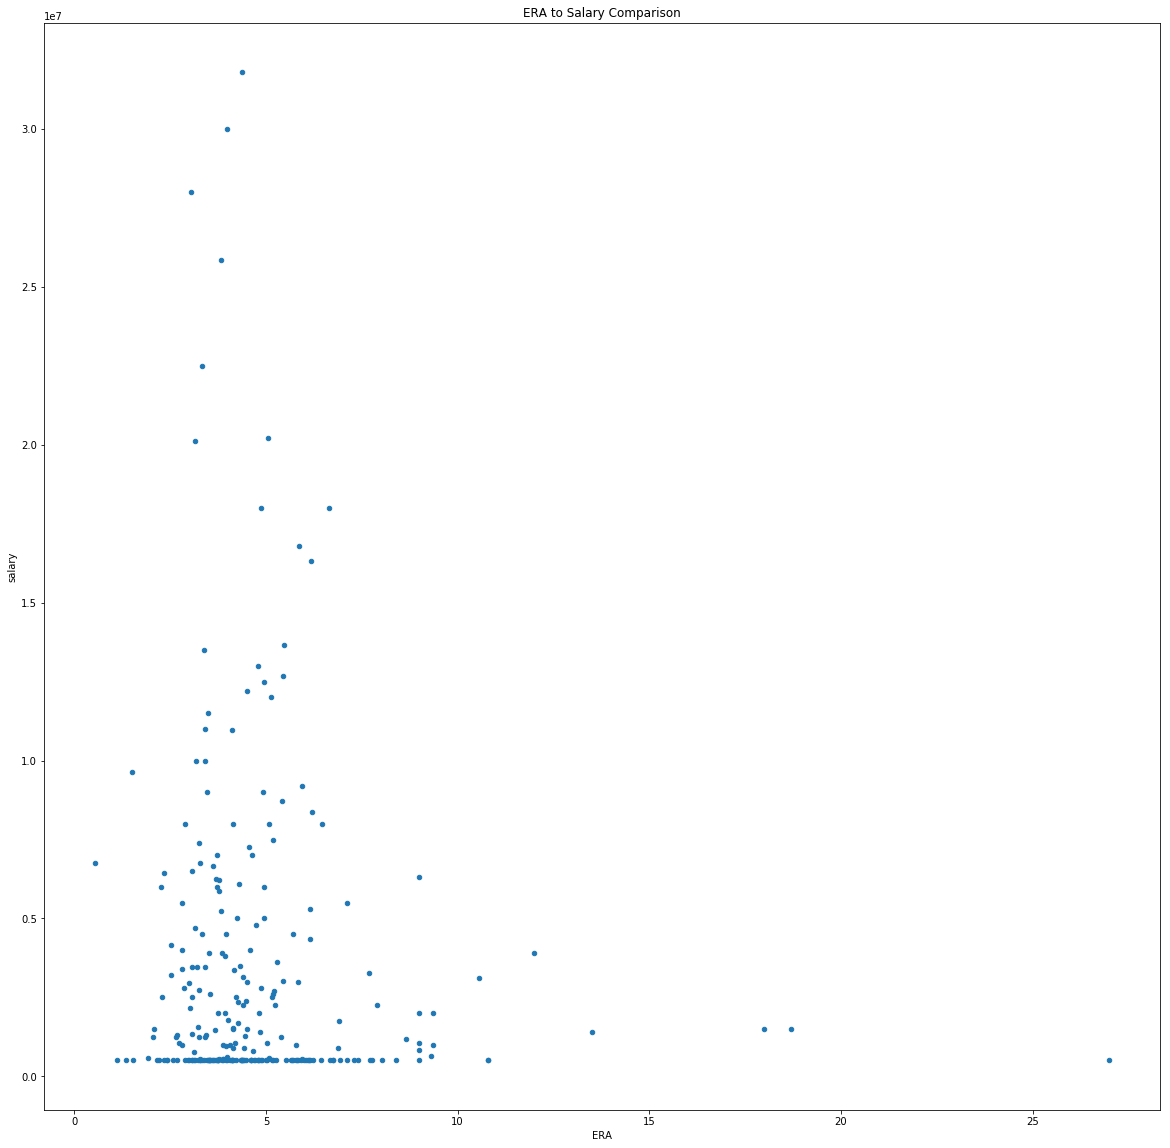

In [159]:
pitcher_salary_df = pitching_df.merge(salary_df, on=["playerID","yearID","teamID", "lgID"], how="inner")
pitcher_salary_df = pitcher_salary_df.drop_duplicates(subset=["playerID"], keep="last")
pitcher_salary_df = pitcher_salary_df.dropna(subset=["ERA","salary"], how="any")
pitcher_salary_df = pitcher_salary_df[pitcher_salary_df.ERA!=0]
pitcher_salary_df = pitcher_salary_df[pitcher_salary_df.yearID==2016]
pitcher_salary_df.plot(kind="scatter", x="ERA", y="salary", title="ERA to Salary Comparison", figsize=(20,20))

In [161]:
pitcher_salary_df[pitcher_salary_df.ERA>=15]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
11604,flahery01,2016,1,BAL,AL,0,0,1,0,0,...,0.0,0.0,0,7.0,1.0,2,0.0,0.0,0.0,1500000
11714,penaar01,2016,1,MIL,NL,0,0,1,0,0,...,0.0,0.0,0,11.0,0.0,5,0.0,0.0,1.0,510000
11738,russeja02,2016,1,PHI,NL,0,0,7,0,0,...,0.0,0.0,0,27.0,1.0,9,0.0,1.0,0.0,1500000


In [162]:
pitcher_salary_df[pitcher_salary_df.salary>=30000000]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
11620,greinza01,2016,1,ARI,NL,13,7,26,26,1,...,1.0,0.0,0,667.0,0.0,80,7.0,4.0,9.0,31799030
11724,priceda01,2016,1,BOS,AL,17,9,35,35,2,...,4.0,7.0,0,951.0,0.0,106,8.0,7.0,19.0,30000000


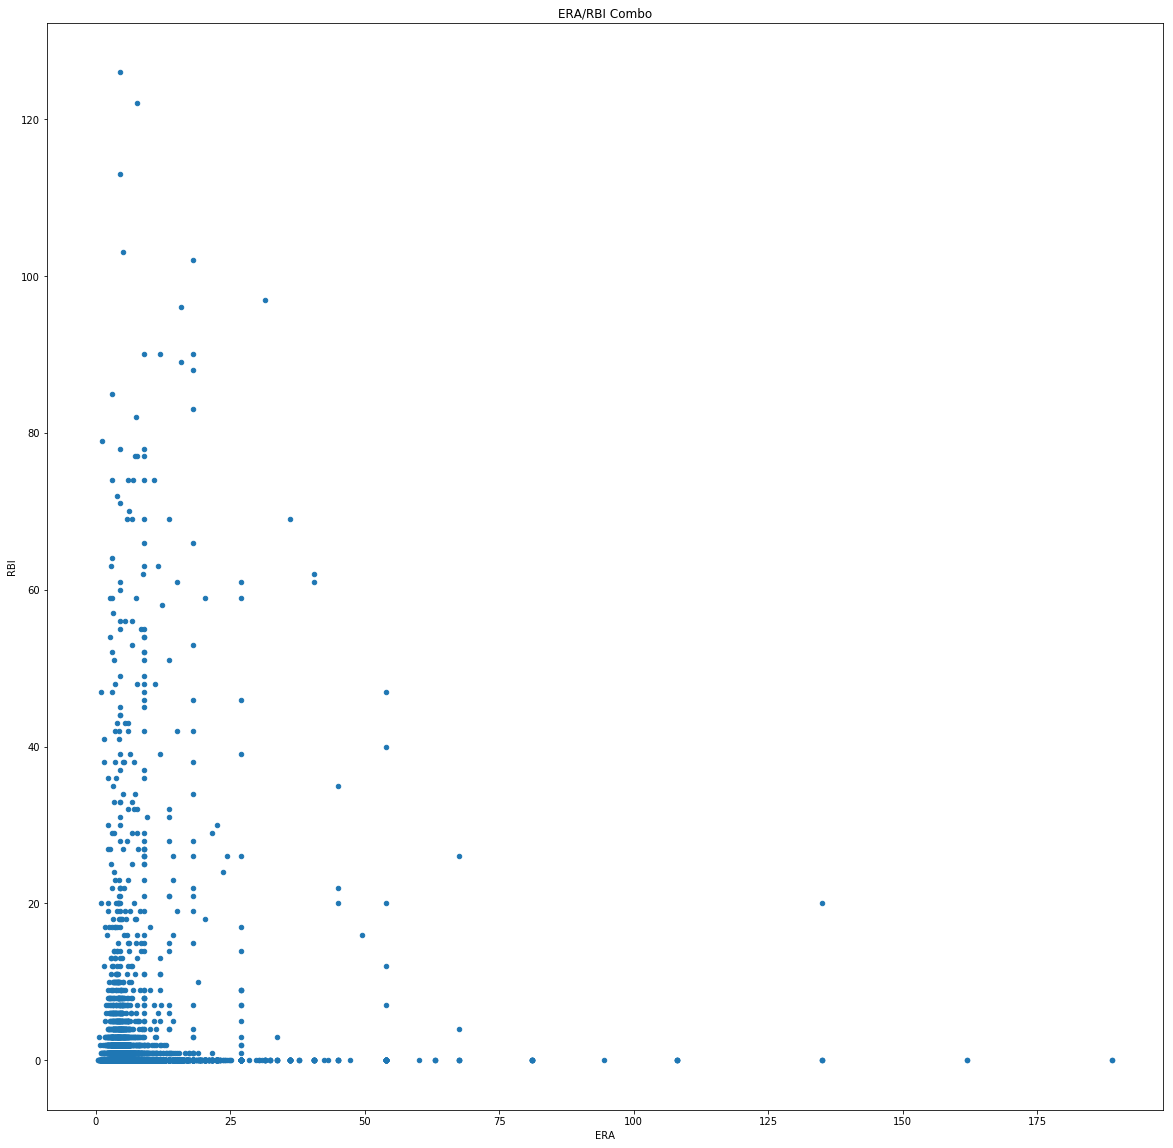

In [173]:
ERA_RBI_df = pitching_df.merge(batting_df, on=["playerID","yearID","teamID", "lgID"], how="inner")
ERA_RBI_df = ERA_RBI_df.drop_duplicates(subset=["playerID"], keep="last")
ERA_RBI_df = ERA_RBI_df.dropna(subset=["ERA","RBI"], how="any")
ERA_RBI_df = ERA_RBI_df[ERA_RBI_df.ERA!=0]
ERA_RBI_df.plot(kind="scatter", x="ERA", y="RBI", title="ERA/RBI Combo", figsize=(20,20))

In [174]:
ERA_RBI_df[ERA_RBI_df.RBI>=110]

,playerID,yearID,stint_x,teamID,lgID,W,L,G_x,GS,CG,...,RBI,SB,CS,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y
1997,mccarto01,1894,1,BSN,NL,0,0,1,0,0,...,126.0,43.0,NaN,59,17.0,NaN,6.0,NaN,NaN,NaN
2534,freembu01,1899,1,WAS,NL,0,0,2,0,0,...,122.0,21.0,NaN,23,NaN,NaN,18.0,5.0,NaN,NaN
11125,willite01,1940,1,BOS,AL,0,0,1,0,0,...,113.0,4.0,4.0,96,54.0,NaN,3.0,1.0,NaN,13.0


In [175]:
ERA_RBI_df[ERA_RBI_df.ERA>=175]

,playerID,yearID,stint_x,teamID,lgID,W,L,G_x,GS,CG,...,RBI,SB,CS,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y
2018,scheija01,1894,1,PHI,NL,0,1,1,1,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12129,clearjo01,1945,1,WS1,AL,0,0,1,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
max(ERA_RBI_df["ERA"])

189.0

In [180]:
mean_league_ERA = pitching_df["ERA"].mean()
mean_league_ERA

5.073269376476365

In [184]:
COL_pitching_df = pitching_df[pitching_df.teamID=="COL"]
mean_COL_ERA = COL_pitching_df["ERA"].mean()
mean_COL_ERA

6.194706896551725

In [194]:
ERA_by_team = pitching_df["ERA"].groupby(pitching_df["teamID"])
list(ERA_by_team)

[('ALT', 489    5.35
  512    7.00
  590    5.25
  632    3.87
  662    9.00
  Name: ERA, dtype: float64), ('ANA', 31106     5.40
  31124     3.29
  31141     0.93
  31180     3.61
  31182     4.29
  31206     4.23
  31235     6.75
  31238    25.07
  31252     3.62
  31254     3.93
  31274     3.65
  31279     3.32
  31294     4.31
  31331     5.85
  31373     5.23
  31380     3.45
  31447     3.46
  31451     6.00
  31542     5.18
  31602     4.93
  31620     0.00
  31717     4.14
  31761     4.27
  31764     6.05
  31790     5.56
  31791     3.39
  31843     4.35
  31846     3.14
  31865     4.98
  31870     4.75
           ...  
  35110     3.28
  35170     4.88
  35192     4.63
  35261    18.00
  35315     5.20
  35334     3.47
  35399     3.03
  35400     2.45
  35426     3.96
  35430     5.77
  35437     2.85
  35490     0.59
  35518     4.43
  35524     2.69
  35619    13.50
  35678     5.01
  35724     3.00
  35736     9.00
  35750     3.93
  35813     4.21
  35846     4.88
  3

In [195]:
ERA_by_team.mean()

teamID
ALT     6.094000
ANA     4.763910
ARI     5.994523
ATL     4.917441
BAL     5.181230
BFN     5.374872
BFP    11.198750
BL1     4.052500
BL2     5.553239
BL3     3.759091
BL4     7.832500
BLA     4.979565
BLF     4.914783
BLN     5.073857
BLU     5.968333
BOS     5.011572
BR1     6.612000
BR2     5.263077
BR3     4.142258
BR4     5.921111
BRF     4.278214
BRO     5.536199
BRP     4.058000
BS1     3.260769
BS2     3.710000
BSN     5.113139
BSP     3.488571
BSU     7.383750
BUF     4.953636
CAL     4.879189
         ...    
SL3     2.296000
SL4     3.316176
SL5     4.842353
SLA     5.358122
SLF     3.585294
SLN     4.853180
SLU     4.486364
SPU     2.810000
SR1     3.000000
SR2     8.317000
TBA     5.627658
TEX     5.487814
TL1     4.551429
TL2     4.594444
TOR     5.485788
TRN     4.527647
TRO     3.465000
WAS     5.173497
WIL     3.728571
WOR     4.032667
WS1     5.602558
WS2     4.670311
WS3     4.460000
WS4     6.910000
WS5     4.990000
WS6     7.977500
WS7     4.390000
WS8    

In [204]:
team_ERA_normalized = ((ERA_by_team.mean())-(mean_league_ERA))/ERA_by_team.std(ddof=1)
team_ERA_normalized

teamID
ALT    0.518905
ANA   -0.105357
ARI    0.111080
ATL   -0.034863
BAL    0.020464
BFN    0.055842
BFP    0.456627
BL1   -0.563754
BL2    0.134316
BL3   -1.596720
BL4    0.746405
BLA   -0.046926
BLF   -0.038162
BLN    0.000213
BLU    0.225946
BOS   -0.016664
BR1    0.467989
BR2    0.062624
BR3   -0.374685
BR4    0.336367
BRF   -0.274187
BRO    0.044050
BRP   -2.119195
BS1   -0.995590
BS2   -0.620869
BSN    0.006069
BSP   -0.978144
BSU    0.199031
BUF   -0.029329
CAL   -0.043076
         ...   
SL3   -1.510048
SL4   -1.132543
SL5   -0.096566
SLA    0.067980
SLF   -1.378811
SLN   -0.043572
SLU   -0.142888
SPU   -2.316828
SR1   -2.745872
SR2    0.591021
TBA    0.057774
TEX    0.095788
TL1   -0.228833
TL2   -0.184882
TOR    0.082472
TRN   -0.167990
TRO   -0.586844
WAS    0.022946
WIL   -0.404940
WOR   -0.761551
WS1    0.063790
WS2   -0.100643
WS3   -0.316068
WS4         NaN
WS5   -0.133819
WS6    0.433226
WS7   -1.060299
WS8    0.040674
WS9    0.351532
WSU   -0.445420
Name: ERA, Length

In [208]:
COL_ERA_normalized = team_ERA_normalized["COL"]
COL_ERA_normalized

0.18612622975928425

In [223]:
ordered_normalized_team_ERA = team_ERA_normalized.sort_values()
list(ordered_normalized_team_ERA).index(0.18612622975928425)

124

In [224]:
len(ordered_normalized_team_ERA)

149